<a href="https://colab.research.google.com/github/deigo-lps/Image-Processing/blob/main/Atividade_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math

digite a media da gaussiana: 128
digite o desvio da gaussana: 20
Resultado da função p(z):  [2.54407014e-11 3.49913297e-11 4.80071669e-11 6.57000909e-11
 8.96891954e-11 1.22131741e-10 1.65894212e-10 2.24775092e-10
 3.03794142e-10 4.09566920e-10 5.50788181e-10 7.38853979e-10
 9.88659820e-10 1.31962160e-09 1.75697755e-09 2.33344340e-09
 3.09131025e-09 4.08509519e-09 5.38488002e-09 7.08050357e-09
 9.28680922e-09 1.21501927e-08 1.58567461e-08 2.06423549e-08
 2.68051767e-08 3.47210118e-08 4.48621758e-08 5.78205952e-08
 7.43359757e-08 9.53300452e-08 1.21948037e-07 1.55608779e-07
 1.98064955e-07 2.51475364e-07 3.18491259e-07 4.02359123e-07
 5.07042603e-07 6.37366619e-07 7.99187055e-07 9.99589835e-07
 1.24712356e-06 1.55207035e-06 1.92675984e-06 2.38593183e-06
 2.94715339e-06 3.63129652e-06 4.46308286e-06 5.47170217e-06
 6.69151129e-06 8.16282044e-06 9.93277357e-06 1.20563290e-05
 1.45973463e-05 1.76297841e-05 2.12390135e-05 2.55232487e-05
 3.05950965e-05 3.65832231e-05 4.36341348e-05 5.191406

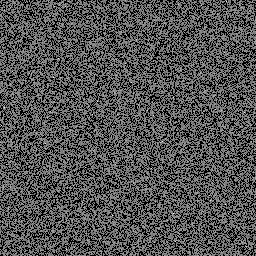

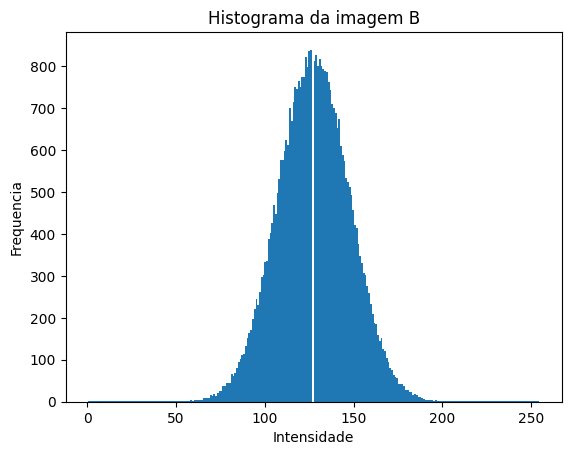

Imagem A com ruído: 


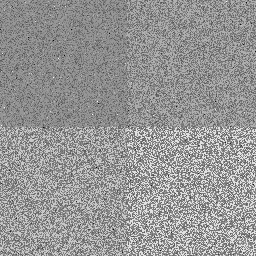

In [ ]:
img = Image.open('c.jpg').convert('L')
img_array = np.array(img)

def create_gaussian_mask(img_shape, mean, std):
    def gaussiana(x, mean, std):
        return 1 / (std * math.sqrt(2 * math.pi)) * math.exp(-(((x - mean) ** 2) / (2 * (std ** 2))))
    #número total de pixels na imagem
    num_pixels = img_shape[0] * img_shape[1]
    #vai armazenar a frequencia de ocorrencia de cada valor de cinza na imagem
    frequencia_ocorrencia = np.zeros(256)
    for i in range(256):
        frequencia_ocorrencia[i] = gaussiana(i, mean, std)
    print("Resultado da função p(z): ",frequencia_ocorrencia)
    #multiplica a frequencia de ocorrencia pelo numero de pixels na imagem, para
    #poder aplicá-los aleatoriamente na máscara.
    frequencia_ocorrencia *= num_pixels
    noise_mask = np.zeros(img_shape)
    available_indices = list(range(num_pixels))
    #enquanto ainda houver algum valor a ser aplicado
    while np.sum(frequencia_ocorrencia) > 0:
        #seleciona índice aleatório da máscara
        index = random.choice(available_indices)
        #pega posição do índice na matriz
        x, y = np.unravel_index(index, img_shape)
        #seleciona um valor de nível de cinza aleatóriamente com base no vetor de  probabilidade p
        pixel_value = np.random.choice(256, p=frequencia_ocorrencia/np.sum(frequencia_ocorrencia))
        #aplica valor à imagem
        noise_mask[x, y] = pixel_value
        #decrementa valor da frequencia de ocorrencia
        frequencia_ocorrencia[pixel_value] -= 1
        if frequencia_ocorrencia[pixel_value] <= 0:
            frequencia_ocorrencia[pixel_value] = 0
            available_indices.remove(index)
    return noise_mask

mean = int(input("digite a media da gaussiana: "))
std = int(input("digite o desvio da gaussana: "))
gaussian_noise_mask = create_gaussian_mask(img_array.shape, mean, std)
print("Imagem B (ruído): ")
Image.fromarray(gaussian_noise_mask).show()
histogram, bins = np.histogram(gaussian_noise_mask.flatten(), bins=256, range=(1, 255))

# Plot the histogram
plt.bar(bins[:-1], histogram, width=1)
plt.xlabel("Intensidade")
plt.ylabel("Frequencia")
plt.title("Histograma da imagem B")
plt.show()


for i in range(0,img_array.shape[0]):
    for j in range(0,img_array.shape[1]):
        if gaussian_noise_mask[i][j]!=0:
            img_array[i][j] = gaussian_noise_mask[i][j]
print("Imagem A com ruído: ")
Image.fromarray(img_array).show()

In [ ]:
img_arrayf = np.asarray(img)
dimensao = img_arrayf.shape

def erromaximo():
    ME = np.zeros_like(img_arrayf)
    for i in range(img_arrayf.shape[0]):
        for j in range(img_arrayf.shape[1]):
            if math.ceil(int(img_arrayf[i,j]) - int(img_array[i,j])) > 0:
                ME[i,j] = math.ceil(int(img_arrayf[i,j]) - int(img_array[i,j]))
            else:
                ME[i,j] = (math.ceil(int(img_arrayf[i,j]) - int(img_array[i,j])))*(-1)
    print(ME)
    np.savetxt('ME.txt', ME, fmt='%d')

def erromedioabsoluto():
    MAE=0
    for i in range(img_arrayf.shape[0]):
        for j in range(img_arrayf.shape[1]):
            if math.ceil(int(img_arrayf[i,j]) - int(img_array[i,j])) > 0:
                MAE += math.ceil(int(img_arrayf[i,j]) - int(img_array[i,j]))
            else:
                MAE += (math.ceil(int(img_arrayf[i,j]) - int(img_array[i,j])))*(-1)
    MAE = MAE/(dimensao[0]*dimensao[1])
    print("Erro médio absoluto:",MAE)

def erromedioquadratico():
    MSE=0
    for i in range(img_arrayf.shape[0]):
        for j in range(img_arrayf.shape[1]):
            if math.ceil(int(img_arrayf[i,j]) - int(img_array[i,j])) > 0:
                MSE += (math.ceil(int(img_arrayf[i,j]) - int(img_array[i,j])))^2
    MSE = MSE/(dimensao[0]*dimensao[1])
    print("Erro médio quadratico:",MSE)

def erroMedioQuadraticoNormalizado():
    mse = np.mean((img_arrayf - img_array) ** 2)
    var = np.var(img_arrayf)
    print("Erro médio quadratico normalizado:",(mse / var))

def raizdoerro():
    RMSE=0
    for i in range(img_arrayf.shape[0]):
        for j in range(img_arrayf.shape[1]):
            if math.ceil(int(img_arrayf[i,j]) - int(img_array[i,j])) > 0:
                RMSE += math.sqrt((math.ceil(int(img_arrayf[i,j]) - int(img_array[i,j])))^2)
    RMSE = RMSE/(dimensao[0]*dimensao[1])
    print("Raiz do erro médio quadratico:",RMSE)

def jaccard():
    ME = 0

    t = input("Digite o valor de tolerância para o Jaccard: ")
    t = int(t)
    dimensao = img_arrayf.shape

    for i in range(img_arrayf.shape[0]):
        for j in range(img_arrayf.shape[1]):
            if int(img_arrayf[i,j]) - int(img_array[i,j]) > 0 and (int(img_arrayf[i,j]) - int(img_array[i,j])) <=t:
                ME += 1
            elif (int(img_arrayf[i,j]) - int(img_array[i,j]))*(-1) <= t:
                ME +=1
    ME = ME/(dimensao[0]*dimensao[1])
    print("Coeficiente de Jaccard com tolerância", t,":",ME)


erromaximo()
erromedioabsoluto()
erromedioquadratico()
erroMedioQuadraticoNormalizado()
raizdoerro()
jaccard()

[[ 54   0  46 ...   0   0   0]
 [ 57  54  62 ...   0  79  76]
 [ 60   0   0 ...  98  81   0]
 ...
 [  0   0 102 ... 144 132 123]
 [  0 100 116 ...   0 123 116]
 [ 93   0   0 ... 131 118   0]]
Erro médio absoluto: 55.71234130859375
Erro médio quadratico: 55.65742492675781
Erro médio quadratico normalizado: 0.08424719452996146
Raiz do erro médio quadratico: 5.848439673728054
Digite o valor de tolerância para o Jaccard: 0
Coeficiente de Jaccard com tolerância 0 : 0.9989471435546875
